In [1]:
import xgboost as xgb
import numpy as np
import scipy
import pandas as pd
import datetime
from time import time
import joblib
import sys
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, recall_score, f1_score, precision_score
import matplotlib.pyplot as plt

H:\Software\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
xtrain = pd.read_csv('C:/Users/Han/Desktop/Box Sync/Stat 485/Final Project/xtrain.csv', index_col = [0])
xtest = pd.read_csv('C:/Users/Han/Desktop/Box Sync/Stat 485/Final Project/xtest.csv', index_col = [0])
ytrain = pd.read_csv('C:/Users/Han/Desktop/Box Sync/Stat 485/Final Project/ytrain.csv', index_col = [0])
ytest = pd.read_csv('C:/Users/Han/Desktop/Box Sync/Stat 485/Final Project/ytest.csv', index_col = [0])

In [3]:
# Use Dmatrix to load the dat

dtrain = xgb.DMatrix(xtrain, ytrain)
dtest = xgb.DMatrix(xtest, ytest)

H:\Software\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [4]:
# the scale positive weights should be # of neg / # of pos
spw = 60016/251758

In [6]:
param1 = {'obj':'binary:logistic'
         ,"scale_pos_weight":spw
         ,"subsample":1
         ,"max_depth":6
         ,"gamma":0
         ,"reg_lambda":1
         ,"reg_alpha":0
         ,"colsample_bytree":1
         ,"colsample_bylevel":1
         ,"colsample_bynode":1}
num_round = 200
time0 = time()
cvresult1 = xgb.cv(param1, dtrain, num_round, nfold = 3, metrics='auc', seed = 127)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))


[21:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "obj" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "obj" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "obj" } might not be used.

  This could be a false alarm, w

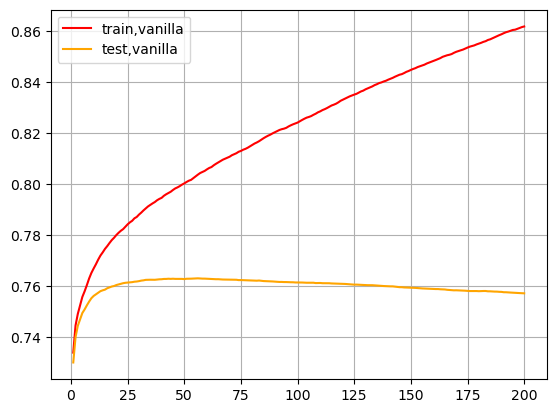

In [7]:
fig,ax = plt.subplots(1)
#ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,num_round+1),cvresult1.iloc[:,0],c="red",label="train,vanilla")
ax.plot(range(1,num_round+1),cvresult1.iloc[:,2],c="orange",label="test,vanilla")
ax.legend()
plt.show()

### The order of tuning: max_depth > eta (usually tuned with n_estimators via gridsearch) > gamma (also for pruning) >> colsample_bytree = colsample_bylevel = colsample_bynode > lambda =alpha

[21:37:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "obj" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:37:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "obj" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:37:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "obj" } might not be used.

  This could be a false alarm, w

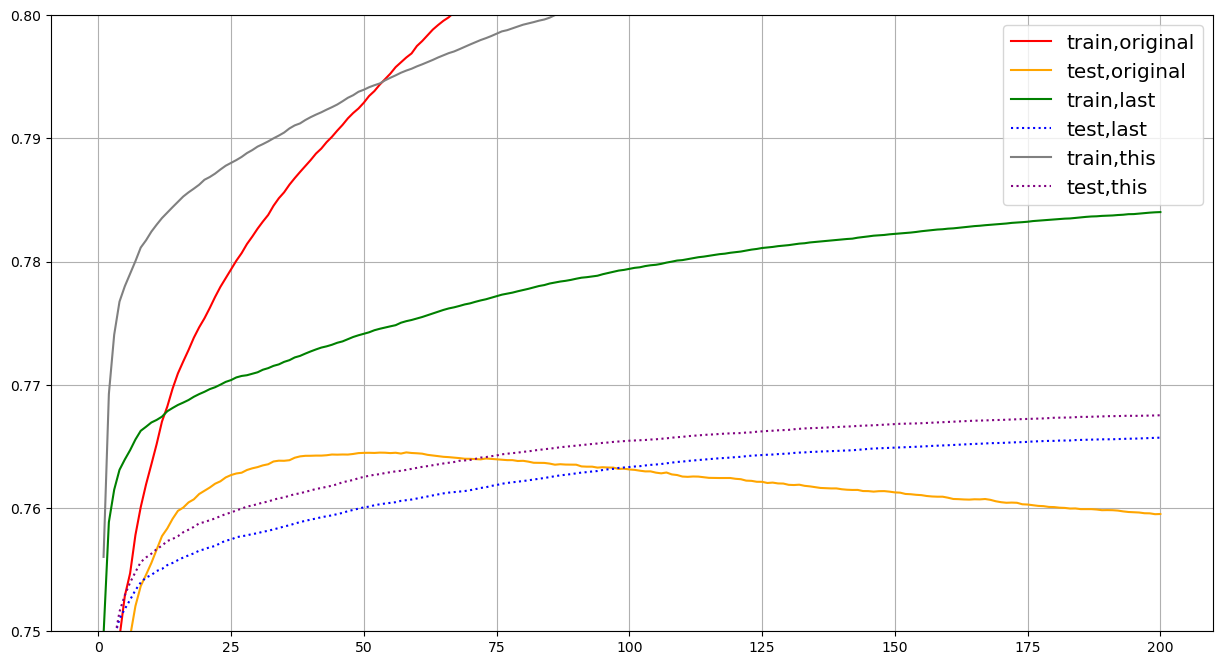

[21:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "obj" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


accuracy is:0.7190121080907705
AUC is:0.7018131790376553


In [8]:
param1 = {'obj':'binary:logistic'
         ,"scale_pos_weight":1
         ,"max_depth":6
         ,"eta":0.3
         ,"gamma":0
         ,"subsample":1
         ,"lambda":1
         ,"alpha":0
         ,"colsample_bytree":1
         ,"colsample_bylevel":1
         ,"colsample_bynode":1
    }
num_round = 200
time0 = time()
cvresult1 = xgb.cv(param1, dtrain, num_round, nfold =5, metrics='auc')
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(.75, .8)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
param2 = {
    'obj':'binary:logistic'
    ,"scale_pos_weight": spw
         ,"max_depth":15
     ,"gamma":2
            ,"eta":0.04
             ,"subsample":.55
}
param3 = {
    'obj':'binary:logistic'
    ,"scale_pos_weight":spw
         ,"max_depth":15
     ,"gamma":1.5
            ,"eta":0.04
             ,"subsample":.55
}
time0 = time()
cvresult2 = xgb.cv(param2, dtrain, num_round, nfold =5, metrics='auc')
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
time0 = time()
cvresult3 = xgb.cv(param3, dtrain, num_round, nfold =5, metrics='auc')
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,last",linestyle = 'dotted')
ax.plot(range(1,201),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,201),cvresult3.iloc[:,2],c="purple",label="test,this",linestyle = 'dotted')
ax.legend(fontsize="x-large")
plt.show()

param= param2
num_round = 200
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

#set the threshold for classification, since we used scale_positive_weight, 0.5 as threshold should be find
ypred = preds.copy()
ypred[preds > 0.5] = 1
ypred[ypred != 1] = 0

# get the accuracy and auc
test_accuracy = accuracy_score(ytest, ypred)
print('accuracy is:{}'.format(test_accuracy))
test_auc = roc_auc_score(ytest, ypred)
print("AUC is:{}".format(test_auc))

In [9]:
#set the threshold for classification, since we used scale_positive_weight, 0.5 as threshold should be find
ypred = preds.copy()
ypred[preds > 0.5] = 1
ypred[ypred != 1] = 0

# get the accuracy and auc
test_accuracy = accuracy_score(ytest, ypred)
print('accuracy is:{}'.format(test_accuracy))
test_auc = roc_auc_score(ytest, ypred)
print("AUC is:{}".format(test_auc))

accuracy is:0.7190121080907705
AUC is:0.7018131790376553


### Plot the final XGBoost model

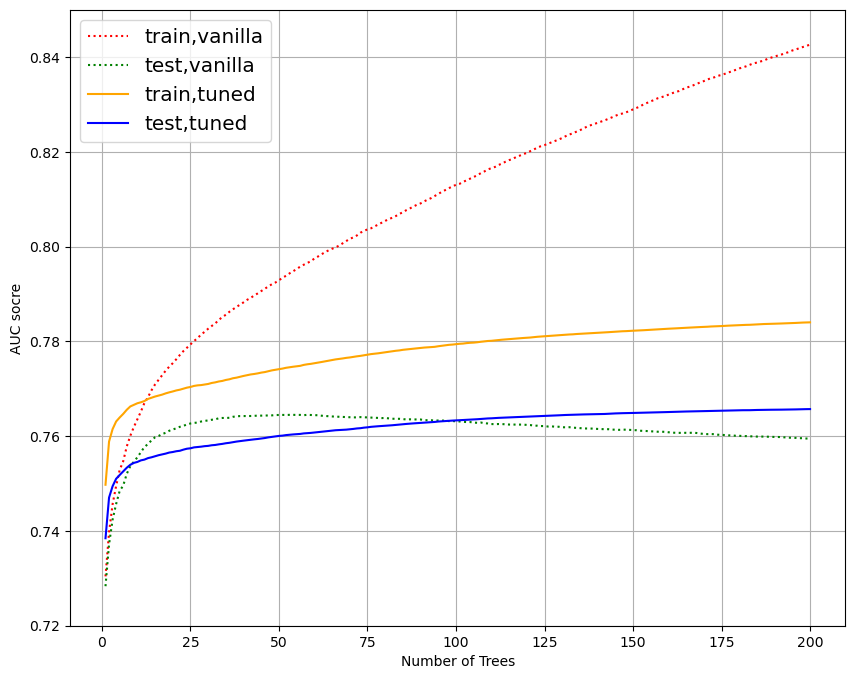

In [25]:
fig,ax = plt.subplots(1,figsize=(10,8))
ax.set_ylim(0.72, .85)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,vanilla",linestyle = 'dotted')
ax.plot(range(1,201),cvresult1.iloc[:,2],c="green",label="test,vanilla",linestyle = 'dotted')
ax.plot(range(1,201),cvresult2.iloc[:,0],c="orange",label="train,tuned")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,tuned")
plt.xlabel('Number of Trees')
plt.ylabel('AUC socre')
ax.legend(fontsize="x-large")
plt.show()